# CONTENT
1. [Introduction](#1)
2. [Load and Check Data](#2)
3. [Outlier Detection](#3)
4. [Fill Missing Value](#4)
5. [Data Visualization](#5)
6. [Machine Learning Algorithms](#6)
7. [Results](#7)





<a id="1"> </a>
## INTRODUCTION

* Chronic kidney disease (CKD) is an important public health problem worldwide, especially for underdeveloped countries. Chronic kidney disease means that the kidney is not working as expected and cannot filter blood properly. Approximately 10% of the world's population suffers from this disease and millions die every year. Recently, the number of patients who have reached renal insufficiency is increasing, which necessitates kidney transplant or dialysis. CKD does not show any symptoms in its early stages. The only way to find out if the patient has kidney disease is by testing. Early detection of CKD in its early stages can help the patient receive effective treatment. 
* The aim of this study is to analyze the methods and compare their accuracy values by using 6 different machine learning methods.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.metrics import sensitivity_score
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

from collections import Counter
plt.style.use("seaborn-muted")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Using TensorFlow backend.


ckdisease

/kaggle/input/ckdisease/kidney_disease.csv


<a id="2"> </a>
## LOAD AND CHECK DATA

In [2]:
#upload dataset
df = pd.read_csv("/kaggle/input/ckdisease/kidney_disease.csv") 

In [3]:
#info about dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
#first five rows of dataset
df.head(10) 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [5]:
#drop id column
df.drop(["id"],axis=1,inplace=True) 

In [6]:
#convert to numeric data type
df.pcv = pd.to_numeric(df.pcv, errors='coerce')
df.wc = pd.to_numeric(df.wc, errors='coerce')
df.rc = pd.to_numeric(df.rc, errors='coerce')

In [7]:
#statistical information of the features used in the data set
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [8]:
#correlation between the features used in the data set
df.corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
bu,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
sc,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sod,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
pot,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


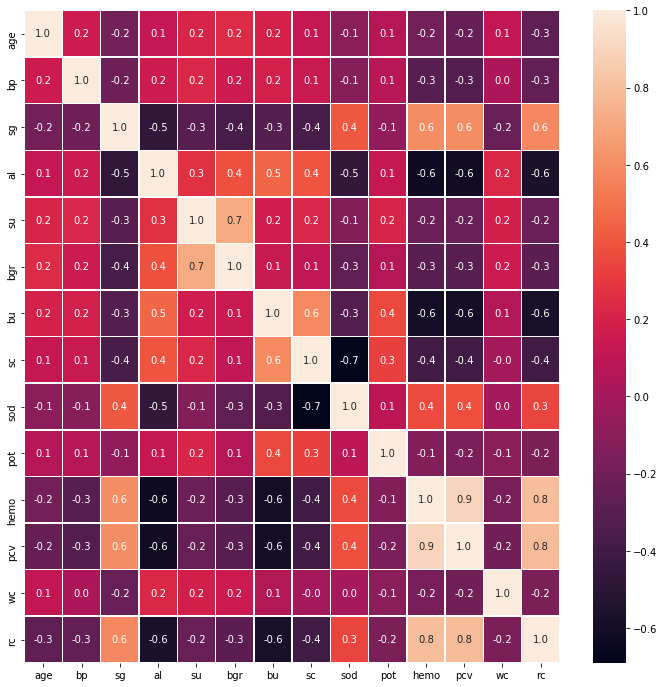

In [9]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

<a id="3"> </a>
## OUTLIER DETECTION

In [10]:
#detect outliers
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        Q1=np.percentile(df[c],25) #1st quartile
        Q3=np.percentile(df[c],75) #3rd quartile
        IQR=Q3-Q1                  #IQR
        outlier_step=IQR*1.5       #Outlier step
        outlier_list_col=df[(df[c]<Q1-outlier_step) | (df[c]>Q3 + outlier_step)].index #Detect outlier and their indeces
        outlier_indices.extend(outlier_list_col) #Store indeces
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers=list(i for i,v in outlier_indices.items() if v>2)
    
    return multiple_outliers

In [11]:
#check if I have outliers
df.loc[detect_outliers(df,["age","bp","sg","al","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc"])]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


<a id="4"> </a>
## FILL MISSING VALUE

In [12]:
#number of missing values in features
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [13]:
#another way to show missing data

#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#plt.grid()
#plt.title("Number of Missing Values")

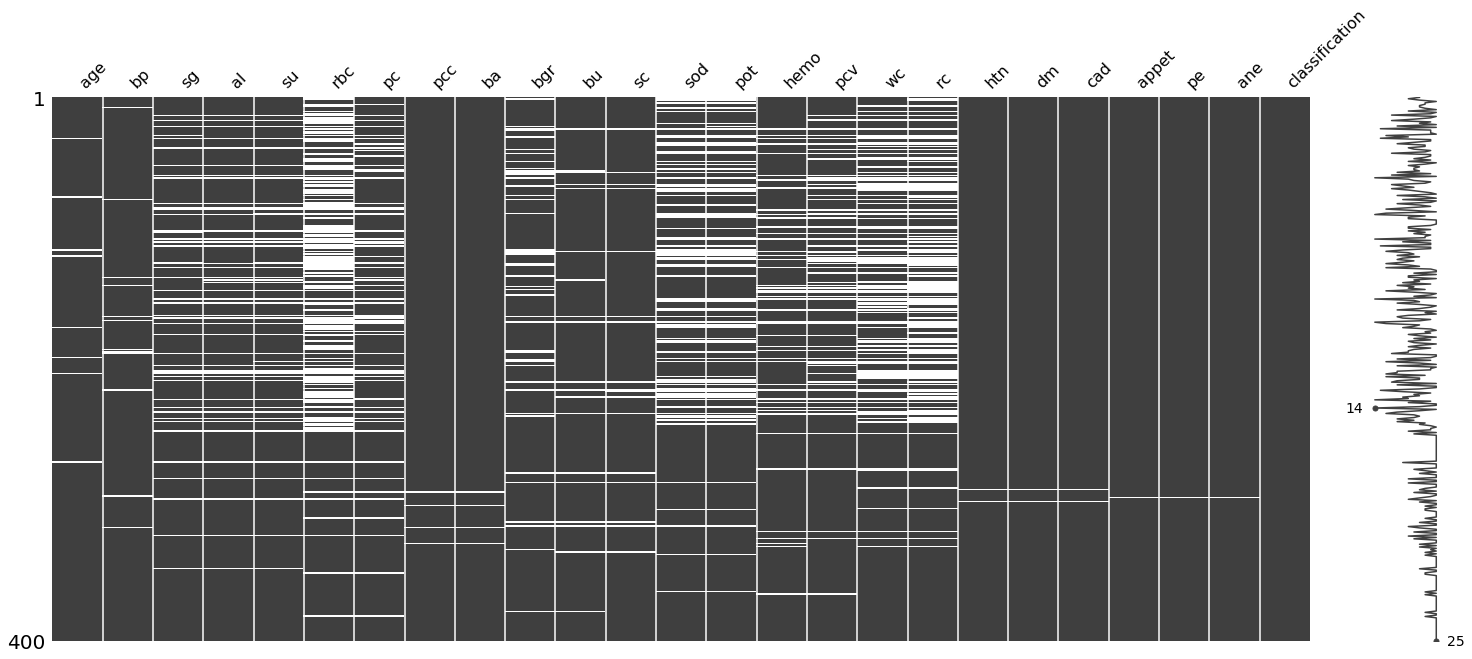

In [14]:
#show missing data
import missingno as msno

msno.matrix(df)
plt.show()

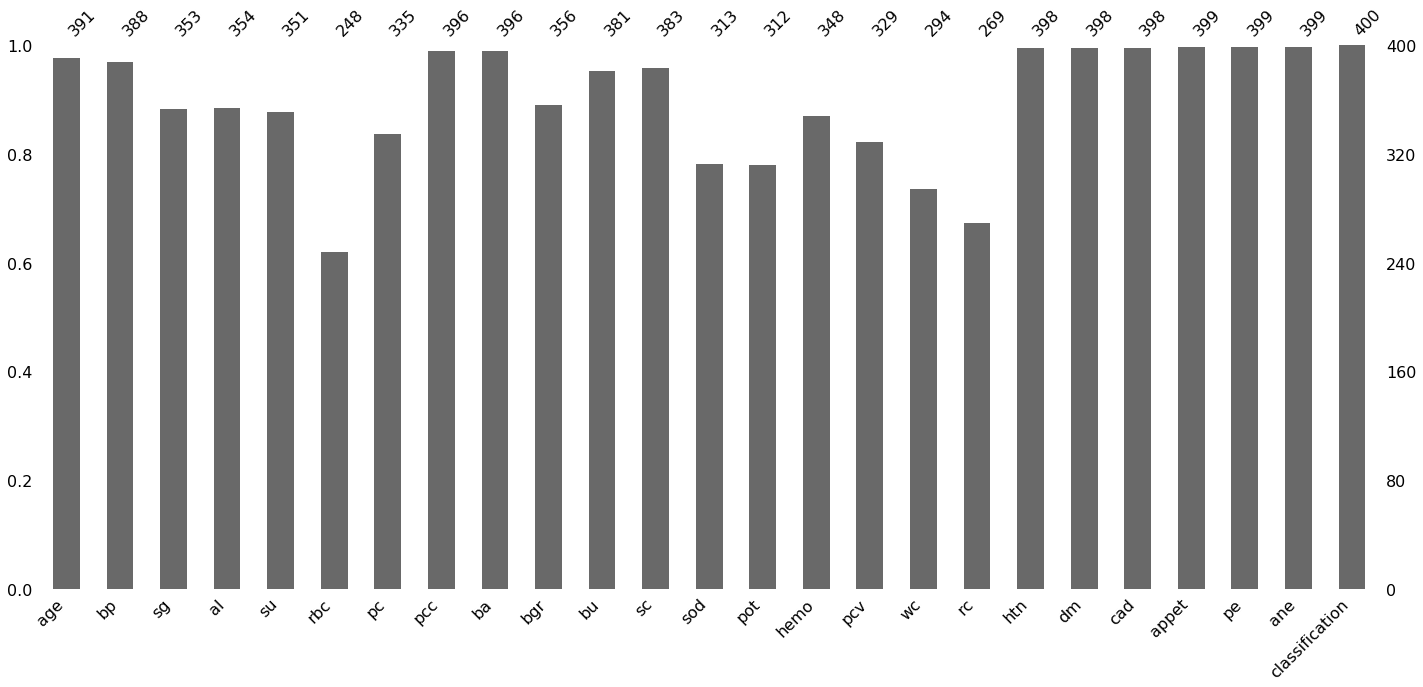

In [15]:
#show missing data
msno.bar(df)
plt.show()

In [16]:
#how missing data in age 
df[df["age"].isnull()]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
30,NaN,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,93.0,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
73,NaN,100.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,129.0,...,14.0,6300.0,NaN,yes,no,no,good,yes,yes,ckd
112,NaN,60.0,1.015,3.0,0.0,abnormal,abnormal,notpresent,notpresent,NaN,...,33.0,NaN,NaN,no,no,no,good,no,no,ckd
116,NaN,70.0,1.015,4.0,0.0,abnormal,normal,notpresent,notpresent,104.0,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
117,NaN,70.0,1.020,0.0,0.0,NaN,NaN,notpresent,notpresent,219.0,...,37.0,9800.0,4.4,no,no,no,good,no,no,ckd
169,NaN,70.0,1.010,0.0,2.0,NaN,normal,notpresent,notpresent,220.0,...,27.0,NaN,NaN,yes,yes,no,good,no,yes,ckd
191,NaN,70.0,1.010,3.0,0.0,normal,normal,notpresent,notpresent,110.0,...,26.0,9200.0,3.4,yes,yes,no,poor,no,no,ckd
203,NaN,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,207.0,...,NaN,NaN,NaN,yes,yes,no,good,no,yes,ckd
268,NaN,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,100.0,...,53.0,8500.0,4.9,no,no,no,good,no,no,notckd


In [17]:
#fill missing data with mean value
df["bgr"]= df["bgr"].fillna(np.mean(df["bgr"]))
df["bu"]= df["bu"].fillna(np.mean(df["bu"]))
df["sc"]= df["sc"].fillna(np.mean(df["sc"]))
df["sod"]= df["sod"].fillna(np.mean(df["sod"]))
df["pot"]= df["pot"].fillna(np.mean(df["pot"]))
df["hemo"]= df["hemo"].fillna(np.mean(df["hemo"]))
df["pcv"]= df["pcv"].fillna(np.mean(df["pcv"]))
df["wc"]= df["wc"].fillna(np.mean(df["wc"]))
df["rc"]= df["rc"].fillna(np.mean(df["rc"]))

In [18]:
#The number "1" is indicated by "ckd" (the condition of kidney disease) and the number 
#"0" is indicated by "notckd" (the state of the absence of kidney disease).
df["classification"] = [1 if i == "ckd" else 0 for i in df["classification"]]

<a id="5"> </a>
## DATA VISUALIZATION

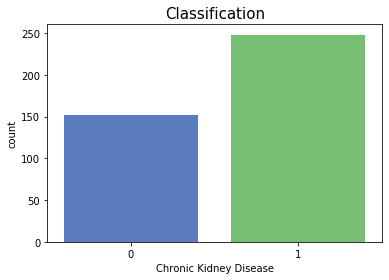

In [19]:
sns.countplot(df.classification)
plt.xlabel('Chronic Kidney Disease')
plt.title("Classification",fontsize=15)
plt.show()

In [20]:
#sns.pairplot(df)
#plt.show()

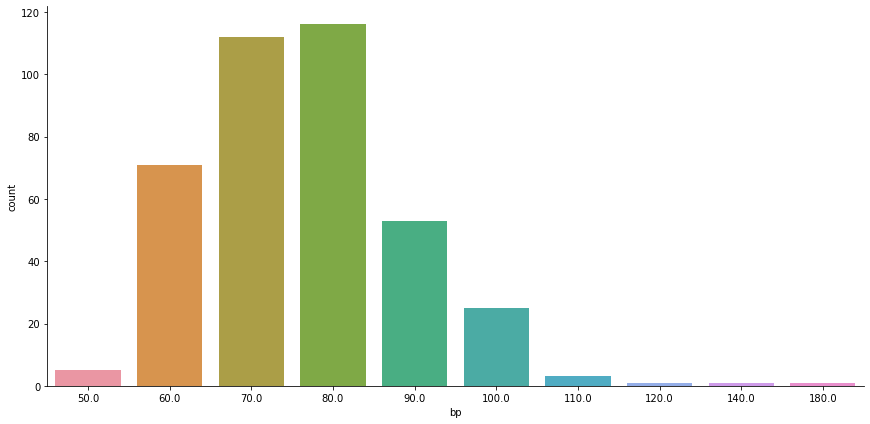

In [21]:
#blood pressure-frequency graph
sns.factorplot(data=df, x='bp', kind= 'count',size=6,aspect=2)

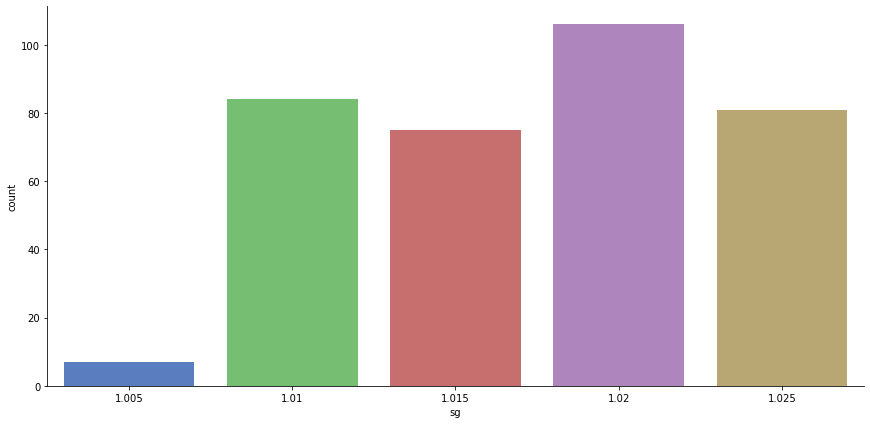

In [22]:
#density-frequency graph
sns.factorplot(data=df, x='sg', kind= 'count',size=6,aspect=2)

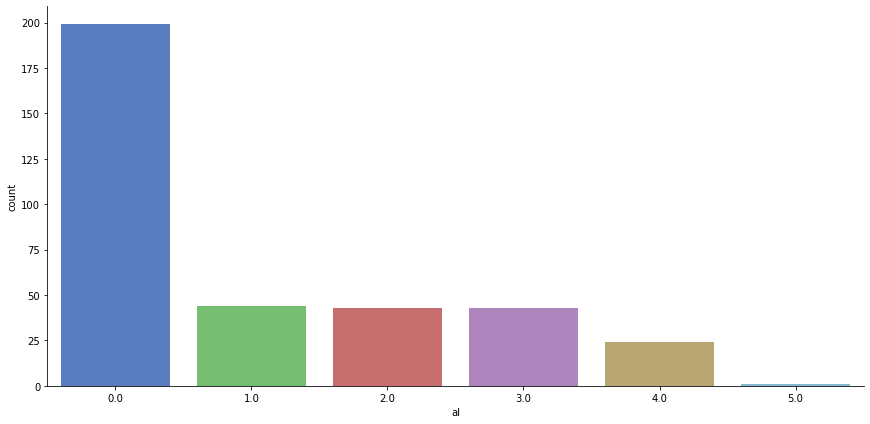

In [23]:
#albumin-frequency graph
sns.factorplot(data=df, x='al', kind= 'count',size=6,aspect=2)

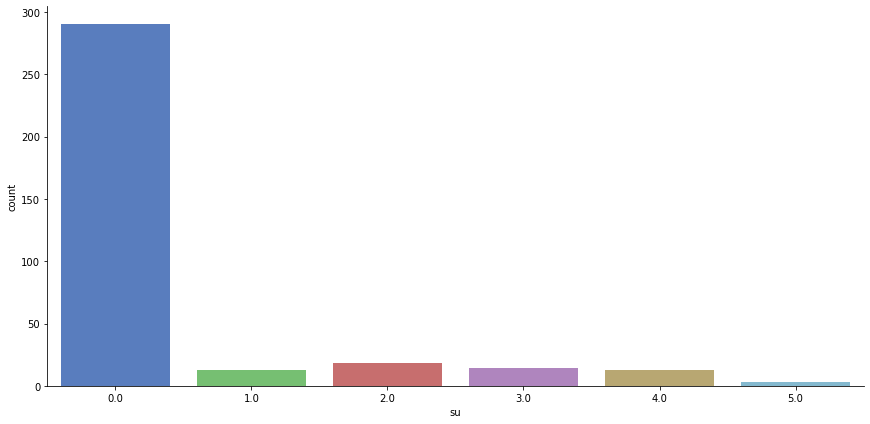

In [24]:
#sugar-frequency graph
sns.factorplot(data=df, x='su', kind= 'count',size=6,aspect=2)

In [25]:
df['dm'] = df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
df['cad'] = df['cad'].replace(to_replace='\tno',value='no')

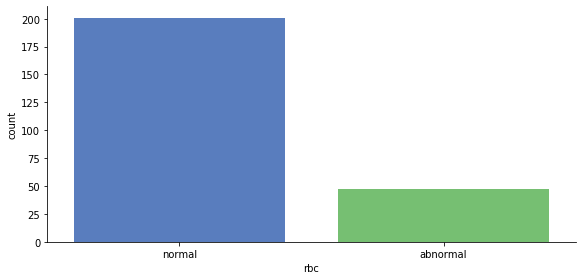

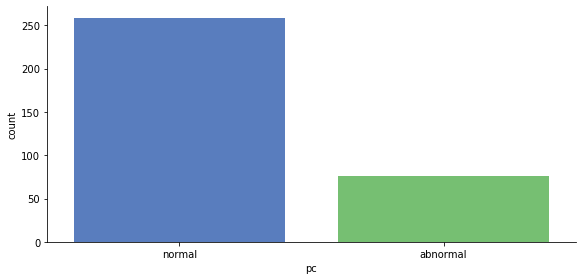

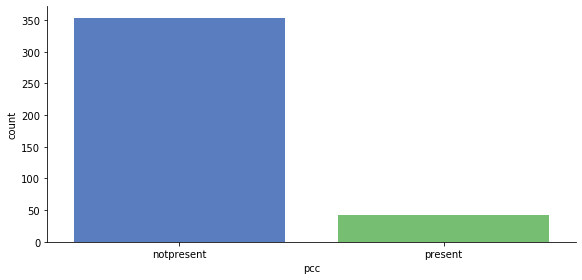

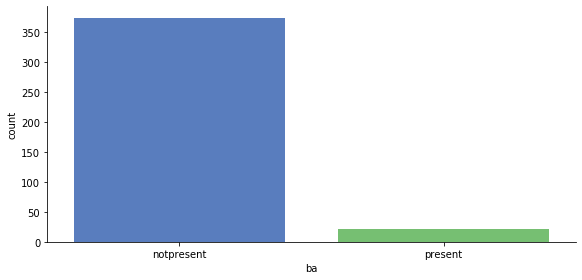

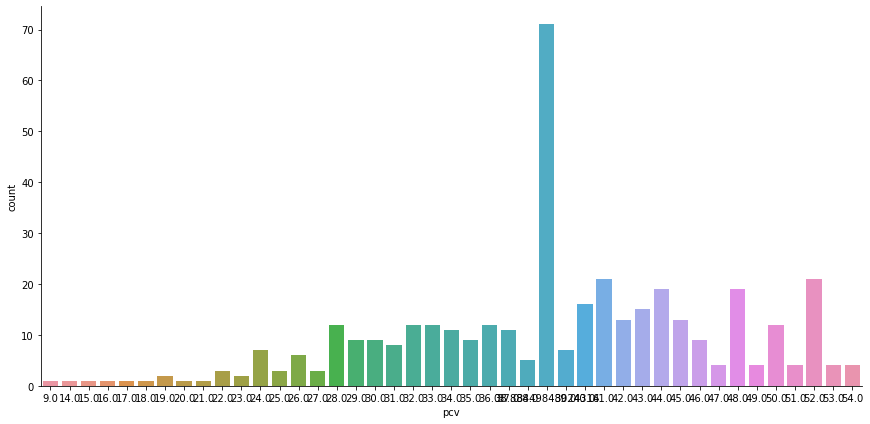

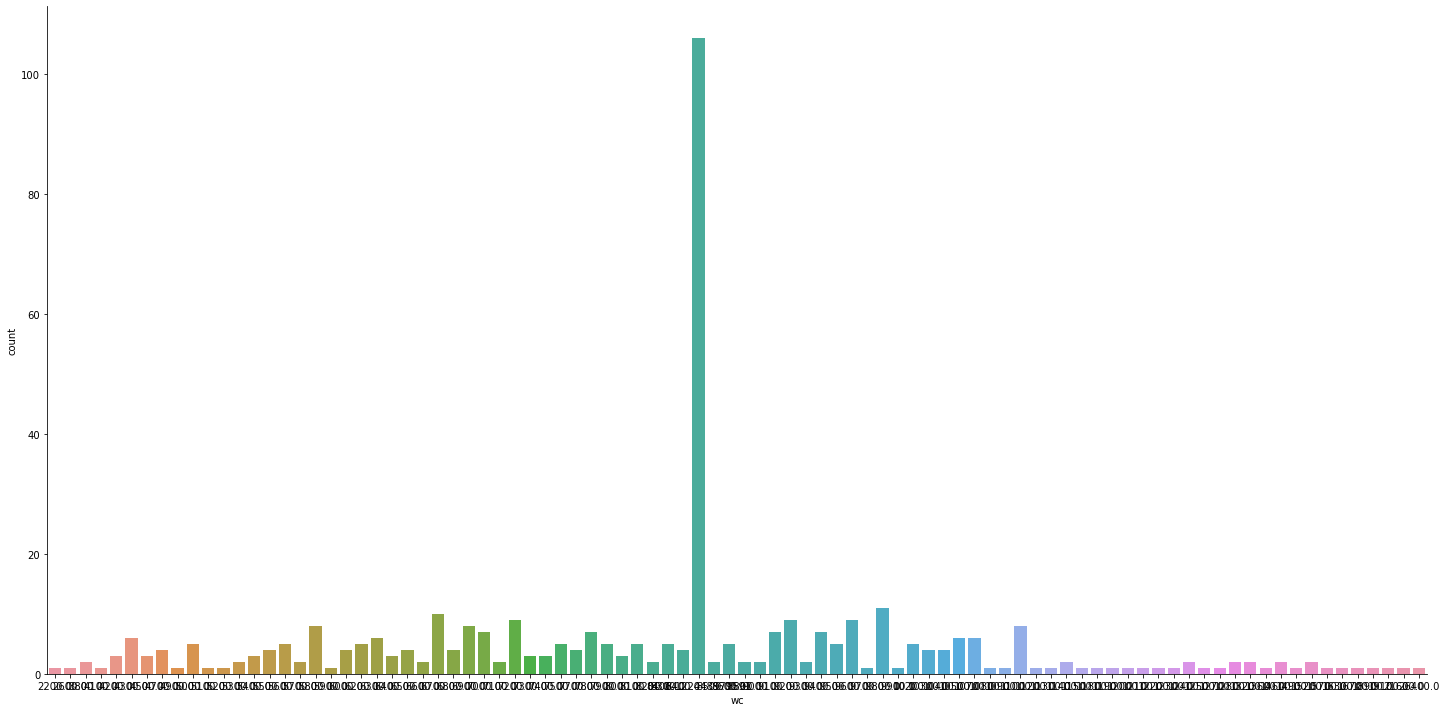

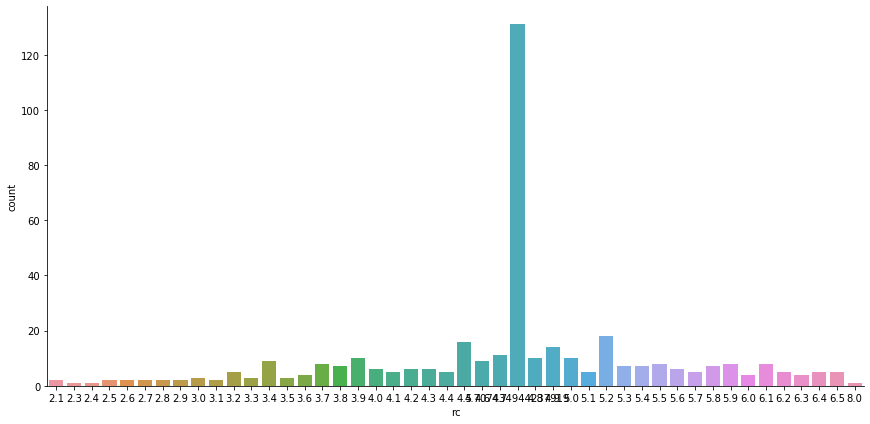

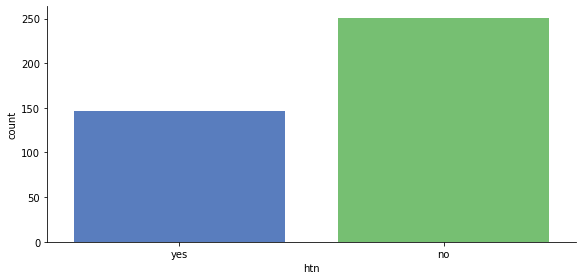

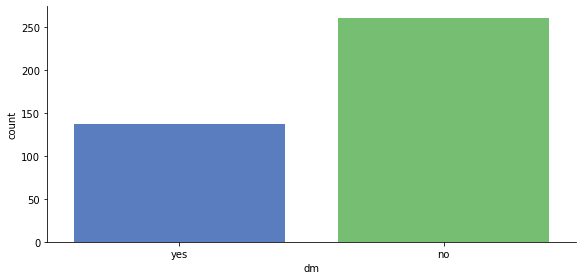

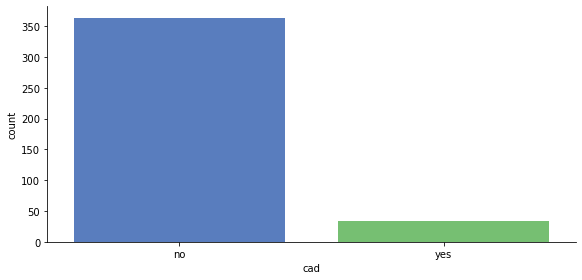

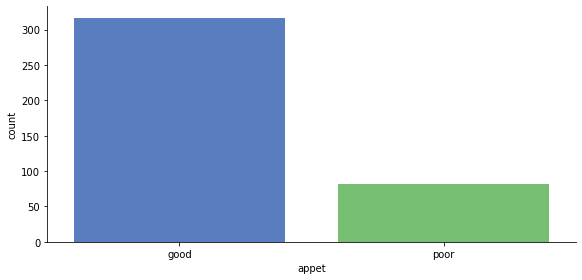

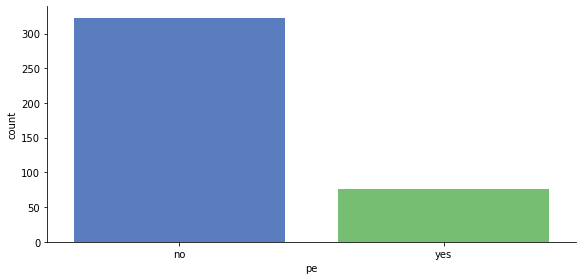

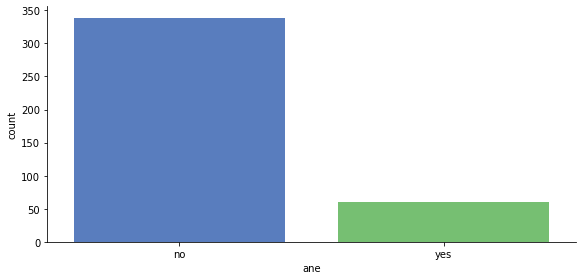

In [26]:
#Check the bar graph of categorical data using factorplot
sns.factorplot(data=df, x='rbc', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='pc', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='pcc', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='ba', kind= 'count',size=4,aspect=2)

sns.factorplot(data=df, x='pcv', kind= 'count',size=6,aspect=2)
sns.factorplot(data=df, x='wc', kind= 'count',size=10,aspect=2)
sns.factorplot(data=df, x='rc', kind= 'count',size=6,aspect=2)

sns.factorplot(data=df, x='htn', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='dm', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='cad', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='appet', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='pe', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='ane', kind= 'count',size=4,aspect=2)

In [27]:
def hist_plot(variable):
    plt.figure(figsize=(9,3))
    plt.hist(df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("Age Distribution with Histogram")
    plt.show()

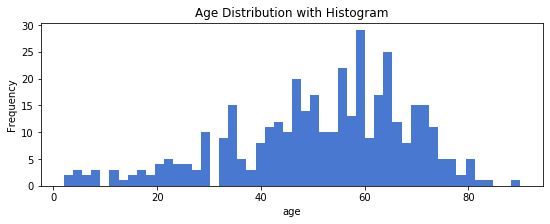

In [28]:
numericVar = ["age"]
for n in numericVar:
    hist_plot(n)

Text(0, 0.5, 'Count')

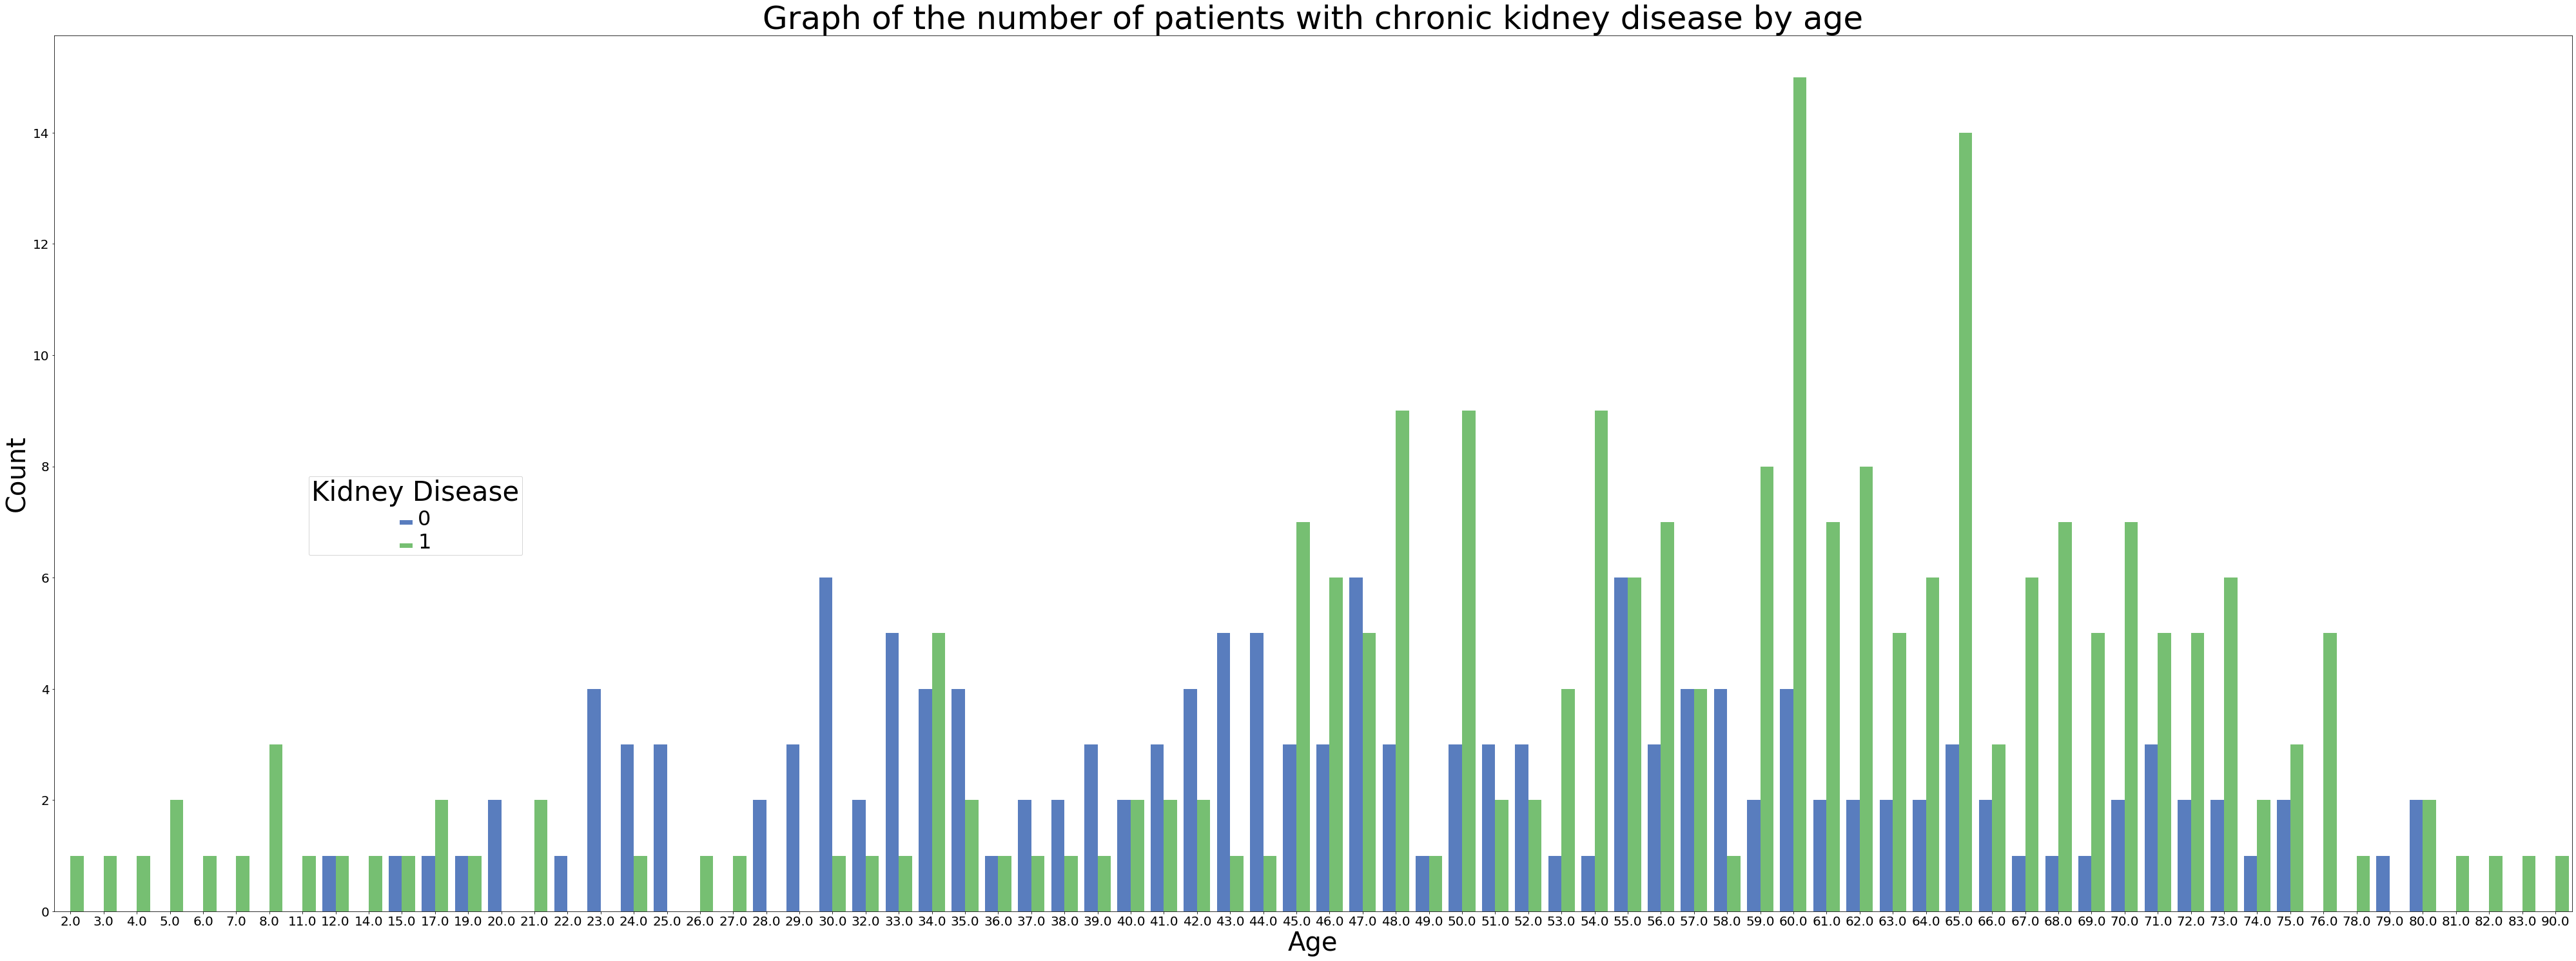

In [29]:
plt.figure(figsize=(70,25))
plt.legend(loc='upper left')
g = sns.countplot(data = df, x = 'age', hue = 'classification')
g.legend(title = 'Kidney Disease', loc='upper left', bbox_to_anchor=(0.1, 0.5), ncol=1)
g.tick_params(labelsize=20)
plt.setp(g.get_legend().get_texts(), fontsize='32')
plt.setp(g.get_legend().get_title(), fontsize='42')
g.axes.set_title('Graph of the number of patients with chronic kidney disease by age',fontsize=50)
g.set_xlabel('Age',fontsize=40)
g.set_ylabel("Count",fontsize=40)

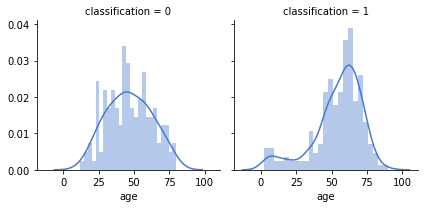

In [30]:
g = sns.FacetGrid(df,col="classification")
g.map(sns.distplot,"age", bins=25)
plt.show()

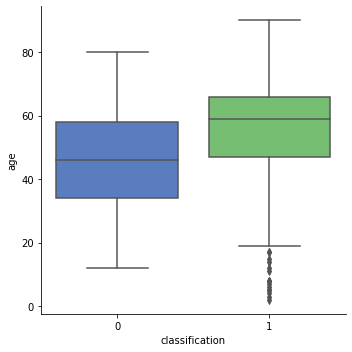

In [31]:
sns.factorplot(x="classification",y="age",data=df,kind="box")
plt.show()

In [32]:
age_corr = ['age', 'classification']
age_corr1 = df[age_corr]
age_corr_y = age_corr1[age_corr1['classification'] == 1].groupby(['age']).size().reset_index(name = 'count')
age_corr_y.corr()

,age,count
age,1.000000,0.392707
count,0.392707,1.000000


Text(0.5, 1.0, 'Correlation graph for Age vs chronic kidney disease patient')

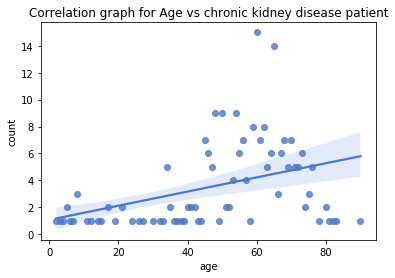

In [33]:
sns.regplot(data = age_corr_y, x = 'age', y = 'count').set_title("Correlation graph for Age vs chronic kidney disease patient")

In [34]:
age_corr_n = age_corr1[age_corr1['classification'] == 0].groupby(['age']).size().reset_index(name = 'count')
age_corr_n.corr()

,age,count
age,1.000000,-0.112343
count,-0.112343,1.000000


Text(0.5, 1.0, 'Correlation graph for Age vs healthy patient')

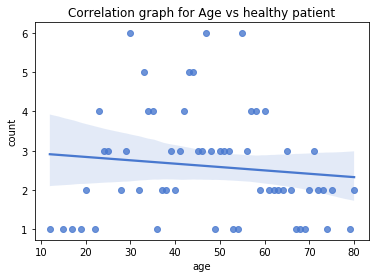

In [35]:
sns.regplot(data = age_corr_n, x = 'age', y = 'count').set_title("Correlation graph for Age vs healthy patient")

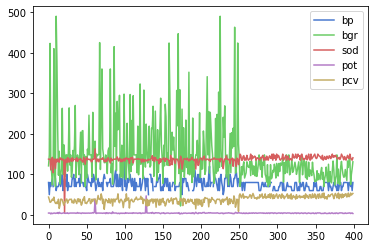

In [36]:
df2 = df.loc[:,["bp","bgr","sod","pot","pcv"]]
df2.plot()

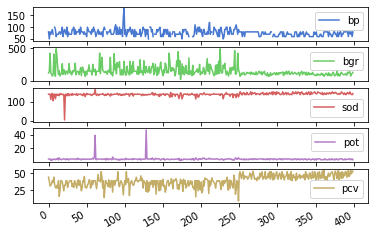

In [37]:
df2.plot(subplots = True)
plt.show()

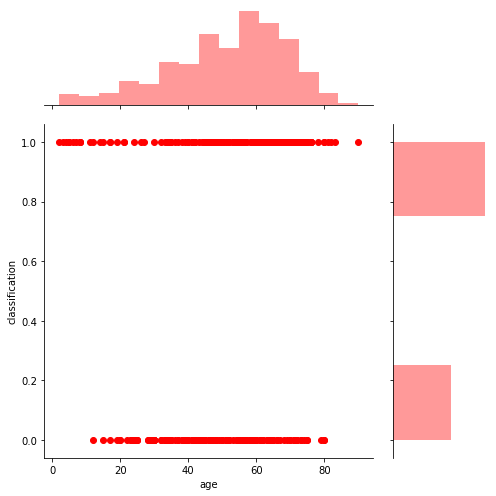

In [38]:
g = sns.jointplot("age", "classification", data=df, size=7,ratio=3, color="r")

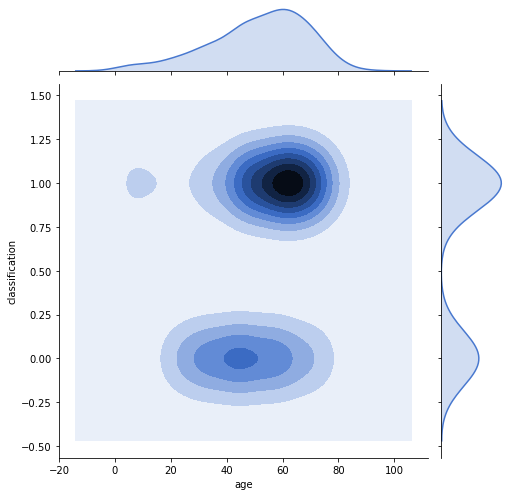

In [39]:
g = sns.jointplot(df.age, df.classification, kind="kde", size=7)
#pearsonr shows the correlation between two features, 1 if positive , -1 if negative, 0 if no correlation.


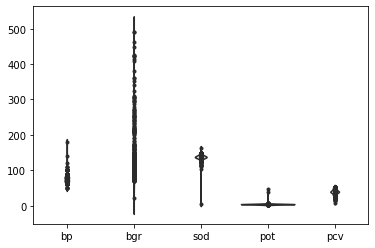

In [40]:
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=df2, palette=pal, inner="points")
plt.show()

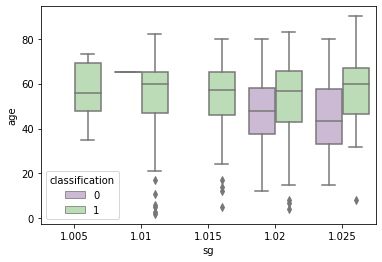

In [41]:
sns.boxplot(x="sg", y="age", hue="classification",data=df, palette="PRGn")
plt.show()

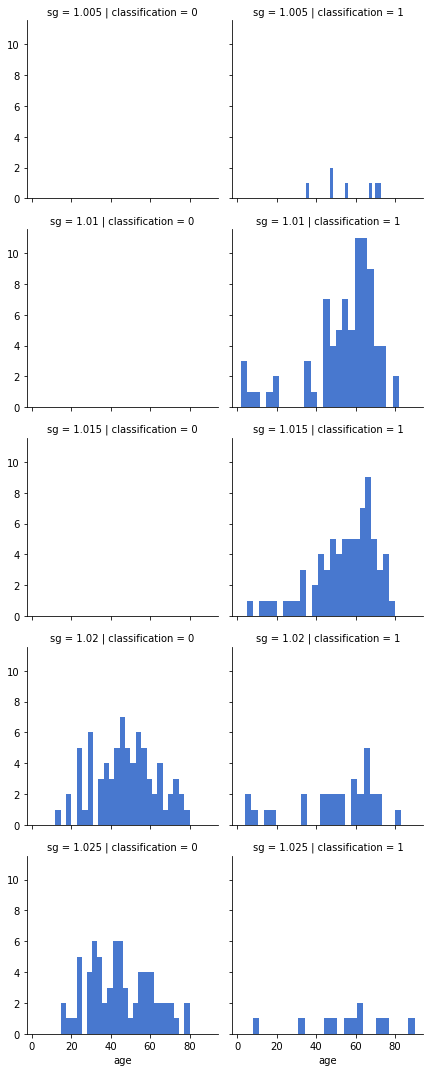

In [42]:
g = sns.FacetGrid(df,col="classification",row="sg")
g.map(plt.hist,"age", bins=25)
g.add_legend()
plt.show()

In [43]:
#I assigned the value 0 and 1 to the nominal features
df['rbc'] = df.rbc.replace(['normal','abnormal'], ['1', '0'])
df['pc'] = df.pc.replace(['normal','abnormal'], ['1', '0'])
df['pcc'] = df.pcc.replace(['present','notpresent'], ['1', '0'])
df['ba'] = df.ba.replace(['present','notpresent'], ['1', '0'])
df['htn'] = df.htn.replace(['yes','no'], ['1', '0'])
df['dm'] = df.dm.replace(['yes','no'], ['1', '0'])
df['cad'] = df.cad.replace(['yes','no'], ['1', '0'])
df['appet'] = df.appet.replace(['good','poor'], ['1', '0'])
df['pe'] = df.pe.replace(['yes','no'], ['1', '0'])
df['ane'] = df.ane.replace(['yes','no'], ['1', '0'])
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [44]:
#then I converted them to numeric data type
df.rbc = pd.to_numeric(df.rbc, errors='coerce')
df.pc = pd.to_numeric(df.pc, errors='coerce')
df.pcc = pd.to_numeric(df.pcc, errors='coerce')
df.ba = pd.to_numeric(df.ba, errors='coerce')
df.htn = pd.to_numeric(df.htn, errors='coerce')
df.dm = pd.to_numeric(df.dm, errors='coerce')
df.cad = pd.to_numeric(df.cad, errors='coerce')
df.appet = pd.to_numeric(df.appet, errors='coerce')
df.pe = pd.to_numeric(df.pe, errors='coerce')
df.ane = pd.to_numeric(df.ane, errors='coerce')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    float64
 6   pc              335 non-null    float64
 7   pcc             396 non-null    float64
 8   ba              396 non-null    float64
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

In [46]:
#I used the knnimputer method for the remaining missing values
#because some features have specific values that's why I didn't get the mean value.
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(df)

In [47]:
df_filled.tolist()

[[48.0,
  80.0,
  1.02,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  121.0,
  36.0,
  1.2,
  137.52875399361022,
  4.627243589743592,
  15.4,
  44.0,
  7800.0,
  5.2,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0],
 [7.0,
  50.0,
  1.02,
  4.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  148.0365168539326,
  18.0,
  0.8,
  137.52875399361022,
  4.627243589743592,
  11.3,
  38.0,
  6000.0,
  4.707434944237919,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0],
 [62.0,
  80.0,
  1.01,
  2.0,
  3.0,
  1.0,
  1.0,
  0.0,
  0.0,
  423.0,
  53.0,
  1.8,
  137.52875399361022,
  4.627243589743592,
  9.6,
  31.0,
  7500.0,
  4.707434944237919,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0],
 [48.0,
  70.0,
  1.005,
  4.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  117.0,
  56.0,
  3.8,
  111.0,
  2.5,
  11.2,
  32.0,
  6700.0,
  3.9,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  1.0],
 [51.0,
  80.0,
  1.01,
  2.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  106.0,
  26.0,
  1.4,
  137.52875399361022,
  4.62724358

In [48]:
#When we use the knnimputer method, we obtained an array
#so I turned it back into a dataframe.
df2 = pd.DataFrame(data = df_filled)

In [49]:
#now I have filled all the features
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
 3   3       400 non-null    float64
 4   4       400 non-null    float64
 5   5       400 non-null    float64
 6   6       400 non-null    float64
 7   7       400 non-null    float64
 8   8       400 non-null    float64
 9   9       400 non-null    float64
 10  10      400 non-null    float64
 11  11      400 non-null    float64
 12  12      400 non-null    float64
 13  13      400 non-null    float64
 14  14      400 non-null    float64
 15  15      400 non-null    float64
 16  16      400 non-null    float64
 17  17      400 non-null    float64
 18  18      400 non-null    float64
 19  19      400 non-null    float64
 20  20      400 non-null    float64
 21  21      400 non-null    float64
 22  22

In [50]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.000000,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,148.036517,...,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.000000,...,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.000000,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.000000,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1.0


<a id="6"> </a>
## MACHINE LEARNING ALGORITHMS

In [51]:
#these variables will be used to show the algorithm name and its successes.
score=[] 
algorithms=[] 
precision=[]
sensitivity=[]
recall=[]
f1score=[]

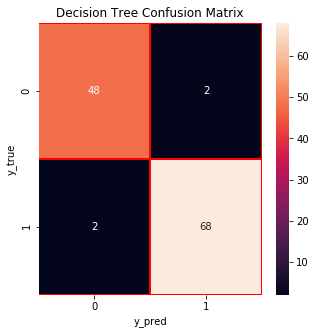

Decision Tree accuracy = 96.66666666666667
Decision Tree precision = 96.57142857142857
Decision Tree sensitivity = 96.57142857142857
Decision Tree recall = 96.57142857142857
Decision Tree f1 score = 97.14285714285714


In [52]:
from sklearn.tree import DecisionTreeClassifier

y=df2[24].values
x_data=df2.drop([24],axis=1)
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

dt = DecisionTreeClassifier(criterion="entropy", max_depth = 5, random_state=1)
dt.fit(x_train,y_train)


#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=dt.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix")
plt.show()

print("Decision Tree accuracy =",dt.score(x_test,y_test)*100)
score.append(dt.score(x_test,y_test)*100)
algorithms.append("Decision Tree")

print("Decision Tree precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("Decision Tree sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("Decision Tree recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("Decision Tree f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)



#y_pred_prob = dt.predict_proba(x_test)[:,1]
#fpr, tpr, thresholds = roc_curve(y_true, y_pred)
#roc_auc = auc(fpr, tpr)
## Plot ROC curve
#plt.figure()
#plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
#plt.plot(fpr, tpr)
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
#plt.show()

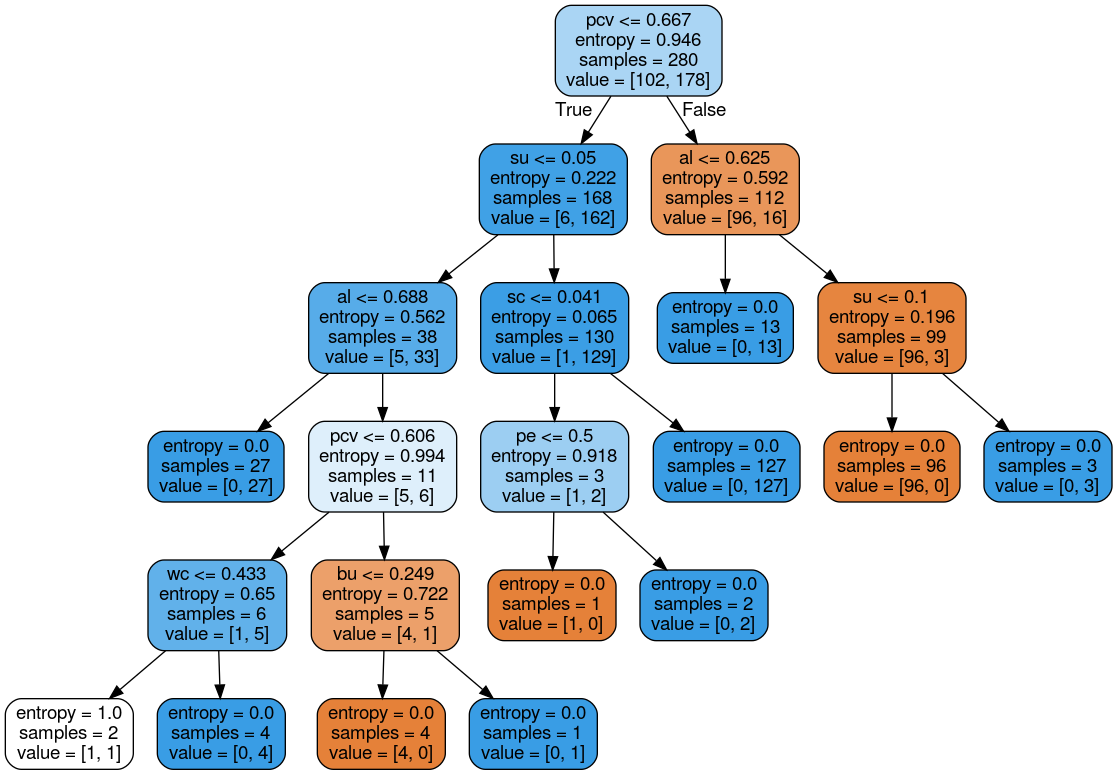

In [53]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)/Graphviz2.38/bin/'

features = list(df.columns[1:])
features

dot_data = StringIO()
export_graphviz(dt, out_file = dot_data,feature_names = features,filled = True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

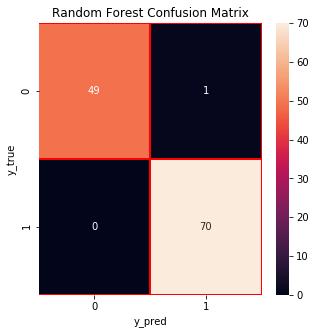

Random Forest accuracy = 99.16666666666667
Random Forest precision = 99.29577464788733
Random Forest sensitivity = 99.0
Random Forest recall = 99.0
Random Forest f1 score = 99.29078014184397


In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train,y_train)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()
print("Random Forest accuracy =",rf.score(x_test,y_test)*100)
score.append(rf.score(x_test,y_test)*100)
algorithms.append("Random Forest")

print("Random Forest precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("Random Forest sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("Random Forest recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("Random Forest f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

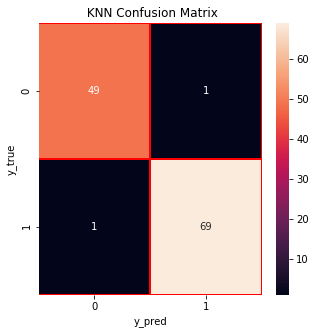

KNN accuracy = 98.33333333333333
KNN precision = 98.28571428571429
KNN sensitivity = 98.28571428571429
KNN recall = 98.28571428571429
KNN f1 score = 98.57142857142858


In [55]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

y=df2[24].values
x_data=df2.drop([24],axis=1)

x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)


#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title(" KNN Confusion Matrix")
plt.show()

print("KNN accuracy =",knn.score(x_test,y_test)*100)
score.append(knn.score(x_test,y_test)*100)
algorithms.append("KNN")

print("KNN precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("KNN sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("KNN recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("KNN f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

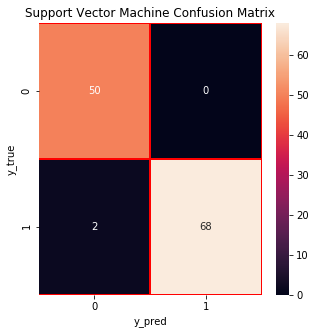

SVM accuracy = 98.33333333333333
SVM precision = 98.07692307692308
SVM sensitivity = 98.57142857142858
SVM recall = 98.57142857142858
SVM f1 score = 98.55072463768116


In [56]:
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=svm.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

print("SVM accuracy =",svm.score(x_test,y_test)*100)
score.append(svm.score(x_test,y_test)*100)
algorithms.append("Support Vector Machine")

print("SVM precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("SVM sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("SVM recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("SVM f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

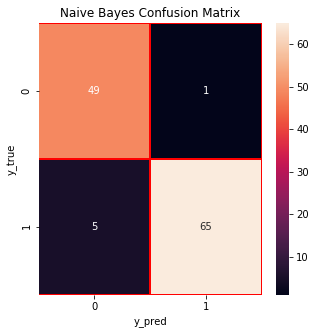

Naive Bayes accuracy = 95.0
Naive Bayes precision = 94.61279461279462
Naive Bayes sensitivity = 95.42857142857143
Naive Bayes recall = 95.42857142857143
Naive Bayes f1 score = 95.58823529411765


In [57]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

#Confusion Matrix 
from sklearn.metrics import confusion_matrix
y_pred=nb.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

print("Naive Bayes accuracy =",nb.score(x_test,y_test)*100)
score.append(nb.score(x_test,y_test)*100)
algorithms.append("Naive Bayes")

print("Naive Bayes precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("Naive Bayes sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("Naive Bayes recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("Naive Bayes f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

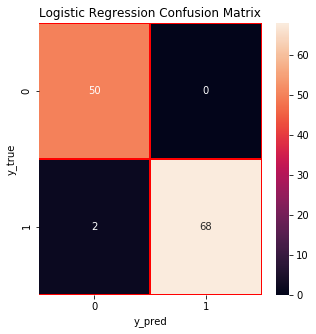

Logistic Regression accuracy = 98.33333333333333
Logistic Regression precision = 98.07692307692308
Logistic Regression sensitivity = 98.57142857142858
Logistic Regression recall = 98.57142857142858
Logistic Regression f1 score = 98.55072463768116


In [58]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print("Logistic Regression accuracy =",lr.score(x_test,y_test)*100)
score.append(lr.score(x_test,y_test)*100)
algorithms.append("Logistic Regression")

print("Logistic Regression precision =",precision_score(y_true, y_pred,average = 'macro')*100)
precision.append(precision_score(y_true, y_pred,average = 'macro')*100)

print("Logistic Regression sensitivity =",sensitivity_score(y_true, y_pred,average = 'macro')*100)
sensitivity.append(sensitivity_score(y_true, y_pred,average = 'macro')*100)

print("Logistic Regression recall =",recall_score(y_true, y_pred,average = 'macro')*100)
recall.append(recall_score(y_true, y_pred,average = 'macro')*100)

print("Logistic Regression f1 score =",f1_score(y_true, y_pred,average = 'binary')*100)
f1score.append(f1_score(y_true, y_pred,average = 'binary')*100)

In [59]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(x_train, y_train)


print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(x_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
#fpr,tpr,roc_auc = auc_scorer(clf, x_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_

Detailed classification report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        50
         1.0       0.99      0.99      0.99        70

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

Confusion Matrix:
[[49  1]
 [ 1 69]]
Best parameters:
{'class_weight': None, 'max_depth': 6, 'n_estimators': 13, 'random_state': 42}


Text(0.5, 1.0, 'Feature Importance')

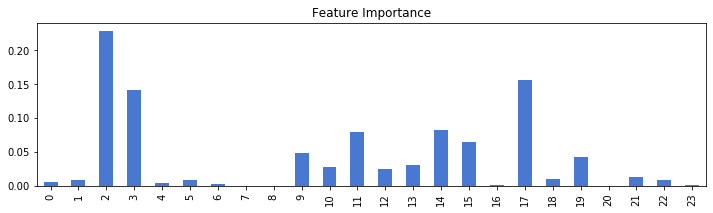

In [60]:
plt.figure(figsize=(12,3))
features = x_test.columns.values.tolist()
importance = clf_best.feature_importances_.tolist()
feature_series = pd.Series(data=importance,index=features)
feature_series.plot.bar()
plt.title('Feature Importance')

In [61]:
trace1 = {
  'x': algorithms,
  'y': score,
  'name': 'score',
  'type': 'bar'
    
}

data = [trace1];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of Accuracy of Classification Algorithms'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [62]:
trace2 = {
  'x': algorithms,
  'y': precision,
  'name': 'score',
  'type': 'bar'
    
}

data = [trace2];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of Precision of Classification Algorithms'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [63]:
trace3 = {
  'x': algorithms,
  'y': sensitivity,
  'name': 'score',
  'type': 'bar'
    
}

data = [trace3];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of Sensitivity of Classification Algorithms'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [64]:
trace4 = {
  'x': algorithms,
  'y': recall,
  'name': 'score',
  'type': 'bar'
    
}

data = [trace4];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of Recall of Classification Algorithms'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [65]:
trace5 = {
  'x': algorithms,
  'y': f1score,
  'name': 'score',
  'type': 'bar'
    
}

data = [trace5];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of F1 Scores of Classification Algorithms'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

<a id="7"> </a>
## RESULTS 

* In this study, 24 data recording information of 400 people such as age, blood pressure, density, diabetes were used as attributes. Clinical records were examined to determine whether chronic kidney disease was present or not, and provided a high accuracy rate with machine learning methods.

* Chronic kidney disease is a disease that hinders the normal functions of the kidney and damages the kidneys. It is one of the common diseases in the world and the prediction of the disease is one of the basic issues in medical diagnosis. Chronic kidney disease is one of the leading causes of death worldwide. Early detection of this disease is very important in terms of health and treatment costs. Many machine learning algorithms have been used in the literature to predict the disease.

* In the study, six different classifiers were utilized in determining the targeted chronic kidney disease and the best performing classifier was tried to be found. These algorithms were compared on the basis of accuracy, sensitivity, sensitivity, recall and f1 score. When the results were evaluated with the data used in this study, it was seen that the random forest method (with an accuracy of 99.16%) performed better than other classification algorithms.

* Machine learning tools can be used for timely and accurate diagnosis of chronic kidney disease, helping doctors confirm their diagnostic findings in a relatively short time, thereby helping a doctor to look and diagnose more patients in less time. In future studies, it may be possible to use different algorithms, such as deep learning methods, to predict chronic kidney disease.